# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab as pl
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')


df = pd.read_csv('human_body_temperature.csv')

Inspect Data for any obvious observations

In [10]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## We will observe the description of the values with the basic observations of standard calculations

In [11]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [134]:
df['gender'].describe()

count     130
unique      2
top         F
freq       65
Name: gender, dtype: object

## We can see that the mean temperature is 98.25 which given that the normal temp is observed at 98.6 is not too great of a difference to impact the results negatively. 

In [12]:
temperature = df['temperature']

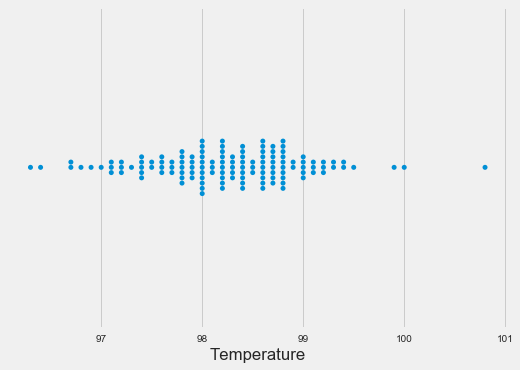

In [15]:
_ = sns.swarmplot(x= temperature, data=df)
_= plt.xlabel('Temperature')
plt.show()

## Swarmplot observations show a good density between 98 and 99 degrees. There are some observable outliers. 

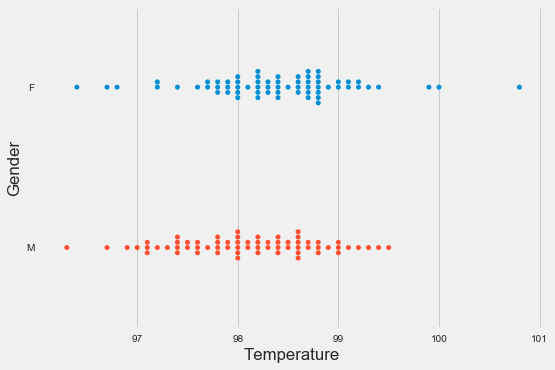

In [14]:
_ = sns.swarmplot(x= temperature, y='gender', data=df)
_= plt.xlabel('Temperature')
_= plt.ylabel('Gender')
plt.show()

## Observing the temperature by gender we can see that males have a slightly lower temperature than the females in the sample. The very high temperature observations seem to be from the females and the low outliers are generated by both male and females observations. 

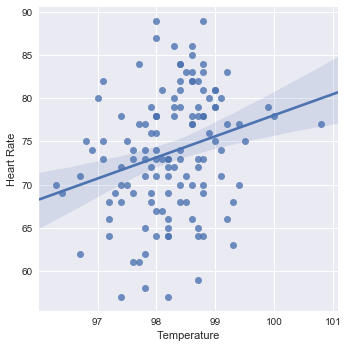

In [42]:
_ = sns.lmplot(x= 'temperature', y='heart_rate', data=df)
_= plt.xlabel('Temperature')
_= plt.ylabel('Heart Rate')
plt.show()

## We can see from the linear regression that the correlation is positive with a decent amount of variance. 

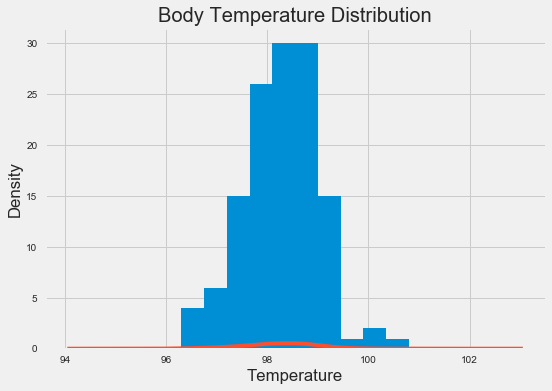

In [105]:
_= temperature.plot(kind='hist', title= 'Body Temperature Distribution')
_= temperature.plot(kind= 'kde')
_= plt.xlabel('Temperature')
plt.show()      

In [39]:
#CLT 

population_temperature_mean= temperature.mean()
print (population_temperature_mean)

np.random.seed(42)
sample_temperature = np.random.choice(temperature, 500) 
print ((sample_temperature.mean()))

population_temperature_mean - sample_temperature.mean()

98.24923076923078
98.3108


-0.061569230769208616

## From the above we can see that the CLT of difference of means between a random larger sample and our original sample is not that large. We can conclude that the data in the sample is sufficient for observations. We can also observe the generated random sample mean is very close to our sample mean. 

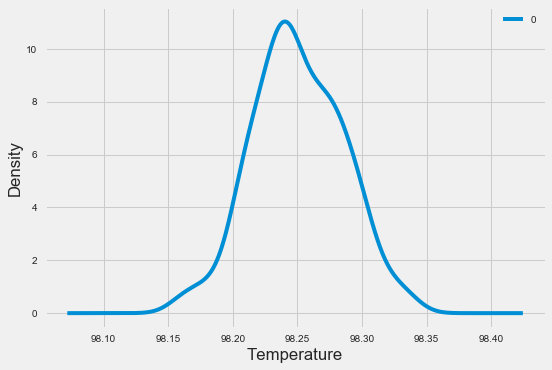

In [102]:
np.random.seed(42)

point_estimates = []         

for x in range(200):         
    sample = np.random.choice(a= temperature, size=500)
    point_estimates.append(sample.mean())
    
_= pd.DataFrame(point_estimates).plot(kind="density") 
_= plt.xlabel('Temperature')
plt.show()

## From the random sample observation of density we can see that the distribution is concentrated from 98.15 to 98.35

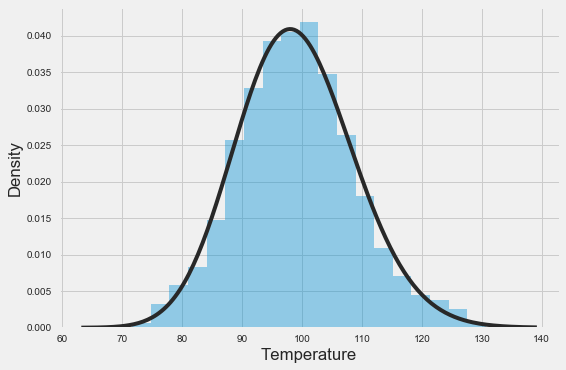

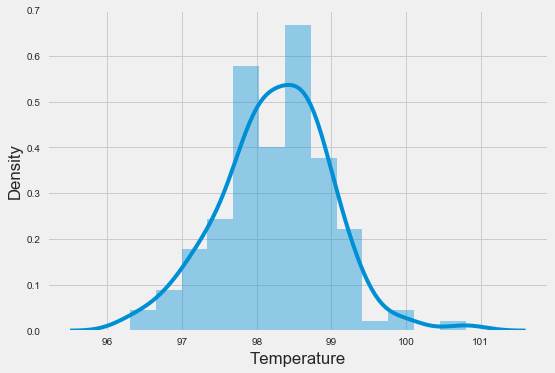

In [136]:
temp = np.random.gamma(98.3108, size=500)
_= sns.distplot(temp, kde=False, fit=stats.gamma)
_= plt.xlabel('Temperature')
_= plt.ylabel('Density')
plt.show()


_= sns.distplot(temperature, kde=True)
_= plt.xlabel('Temperature')
_= plt.ylabel('Density')
plt.show()

## The top graph shows the normalization curve with respect to a histogram plotted with random sample. The bottom graph the the representation of the observed data with the normalizaiton curve. In the random sample we used 98.3108 from our mean of random data sample. 

In [111]:
t_test= stats.ttest_ind(temperature, sample_temperature)
t_test

Ttest_indResult(statistic=-0.83567939122177892, pvalue=0.40365312012576726)

## From the p-value we can determine that the dataset values are independent of the generated sample values. A low p-value wour indicate 

In [97]:
z_score= stats.zscore(temperature)
z_score

array([ 1.43870478,  0.20643202, -0.61508316,  1.30178559, -0.34124477,
        1.30178559, -0.34124477,  0.7541088 ,  0.20643202,  0.48027041,
        0.7541088 , -2.12119432, -0.06740637,  0.61718961, -0.61508316,
        0.7541088 ,  0.06951282, -0.06740637, -1.43659834,  1.57562398,
        0.06951282, -0.06740637,  0.48027041,  0.20643202, -0.61508316,
       -0.34124477, -0.61508316, -0.06740637,  0.20643202, -0.20432557,
        0.06951282, -0.88892155,  0.34335121,  0.48027041,  1.43870478,
        1.71254318,  1.16486639,  0.06951282, -0.47816396, -2.5319519 ,
        0.20643202,  0.20643202, -1.84735592, -1.43659834,  1.0279472 ,
       -0.47816396, -1.16275994, -1.16275994, -0.47816396, -1.57351753,
        0.891028  ,  0.06951282,  0.34335121,  0.48027041, -0.06740637,
        0.48027041,  0.7541088 , -0.06740637, -0.06740637, -0.88892155,
        1.16486639,  0.20643202, -0.06740637,  0.48027041,  0.61718961,
       -1.16275994, -1.16275994,  0.48027041,  0.61718961,  0.89

In [125]:
mean, sigma = np.mean(temperature), np.std(temperature)
conf_int_a = stats.norm.interval(0.95, loc=mean, scale=sigma)
conf_int_b = stats.norm.interval(0.95, loc=mean, scale=sigma / np.sqrt(len(temperature)))

conf_int_a
conf_int_b


(98.123682111456645, 98.37477942700491)

# Conclusion

## This data allows us to conclude that the sample size was sufficient enough to draw the conclusion that the average (or mean) temperature of the sample size is slightly less than the ideal of 98.6 which allows us to understand that there is an allowable variance for normal temperature. We can also deduce from the swarmplot distributions and densities that females in this sample have a slightly higher temperature than males. The highest observed outlier was observed in females and lowest observed outlier was observed in men.

## The p value also tells us that the random generated sample and the original sample are independent values. In both the random sample and original sample we can observe a very similar distribution curve which allows us to perceive that the sample is sufficient in size to achieve the necessary observations and deductions. 

## Overall we can safely assume that there is a range associated to normal temperatures as everyone is not the same, in the observation we can see the range as approximately from 97.8 to 98.8 in this sample. 